# Problema 8.2

<style type="text/css">
    ol { list-style-type: lower-alpha; }
</style>

Considérese un proceso de segundo orden cuya función de transferencia es:

$$G_p = \frac{1}{s^2+2s+1}$$

1. ¿Es estable dicho proceso?

2. Si el proceso se encuentra en un lazo de control, con un controlador PI($K_c=100$, $\tau_I=0.1$), siendo las funciones de transferencia de los elementos medidor y final de control $H=G_v=1$, ¿es estable dicho conjunto? (Puede aplicarse el criterio de Routh-Hurvitz)

3. Hacer el análisis de estabilidad de este sistema de lazo de control en función de $K_c$ y$\tau_I$.

---


**Solución**

a) El diagrama de bloques de este proceso es:

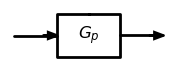

In [7]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=12)

d.add(dsp.Arrow().right())
proc = d.add(dsp.Box(w=1.5, h=1).label(L"G_p").anchor("W"))
d.add(dsp.Arrow().right().at(proc.E))

d.draw(show=false)


La ecuación característica de este sistema será el numerador de la función de transferencia ya que el sistema será estable siempre que sus raíces tengan la parte real negativa:

$$s^2 + s + 1 = 0$$

Para comprobar la estabilidad del proceso se puede aplicar el método de Routh-Hurwitz. La matriz de Routh es:

$$\begin{array}{ll}
     1 & 1\\
     2 & \\
     1 = \frac{(2)  (1)}{2} & 
\end{array}$$

Todos los elementos de la primera columna son positivos, por tanto el sistema es estable.

b) Al existir un controlador por retroalimentación, el diagrama de bloques pasa a ser:

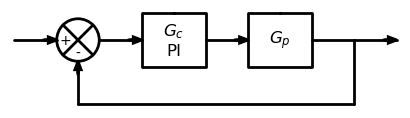

In [12]:
d = schemdraw.Drawing(unit=1, fontsize=12)

d.add(dsp.Arrow().right())
comp = d.add(dsp.Mixer(W="+", S="-").anchor("W"))
d.add(dsp.Arrow().right().at(comp.E))
proc = d.add(dsp.Box(w=1.5, h=1.25).label(L"G_c"*"\nPI").anchor("W"))
d.add(dsp.Arrow().right().at(proc.E))
proc = d.add(dsp.Box(w=1.5, h=1.25).label(L"G_p").anchor("W"))
d.add(dsp.Line().right().at(proc.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().at(dot.center))
d.pop()
d.add(dsp.Line().down().length(1.5))
d.add(dsp.Line().left().tox(comp.S))
d.add(dsp.Arrow().up().to(comp.S))

d.draw(show=false)

En este caso la ecuación característica es:

$$1 + G_c G_p = 0$$

Sustituyendo las funciones de transferencia se obtiene:

$$1 + 100 \left( 1 + \frac{1}{0.1 s} \right) \frac{1}{s^2 + s + 1} = 0$$

Operando se encuentra que:

$$\frac{s^3 + s^2 + 101 s + 1000}{s^3 + s^2 + s} = 0$$

Por tanto:

$$s^3+s^2+101 s+1000=0$$

La matriz de Routh será:

$$\begin{array}{ll}
     1 & 101\\
     1 & 1000\\
     - 899 & 
\end{array}$$
   
El sistema es inestable ya que uno de los elementos de la primera columna tiene signo negativo.

c) La ecuación característica en este caso es:

$$1 + K_c \left( 1 + \frac{1}{\tau_I s} \right) \frac{1}{s^2 + s + 1} = 0$$

Operando se encuentra que:

$$\frac{\tau_I s^3 + \tau_I s^2 + (K_c + 1) \tau_I s + K_c}{\tau_I s^3 +
   \tau_I s^2 + \tau_I s} = 0$$
   
Por tanto,

$$\tau_I s^3 + \tau_I s^2 + (K_c + 1) \tau_I s + K_c = 0$$

La matriz de Routh es:

$$\begin{array}{ll}
     \tau_I & (K_c + 1) \tau_I\\
     \tau_I & K_c\\
     \frac{\tau_I^2  (K_c + 1) - \tau_I K_c}{\tau_I} & 
\end{array}$$

Para que el sistema sea estable todos los elementos de la primera columan deben ser positivos, lo que implica que:

$$\tau_I > 0$$ $$\tau_I   (K_c + 1) - K_c > 0$$

La constante de tiempointegral y la ganancia del controlador son, por definición, positivas. Resolviendo la inecuación se encuentra que para que el sistema sea positivo se tiene que cumplir la condición:

$$\tau_I > - \frac{K_c}{K_c + 1}$$

o la condición:

$$K_c > \frac{\tau_I}{\tau_I - 1}$$